In [1]:
# We imported all the libraries here.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv('car_sales_dataset.csv')
data

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Puma,1.4,Diesel,1994,157846,2517
1,BMW,X3,2.0,Diesel,1999,311477,1220
2,BMW,X3,3.0,Diesel,2004,46905,18888
3,Toyota,Matrix,1.4,Hybrid,1985,226031,955
4,Ford,Puma,1.8,Diesel,1995,168255,2796
...,...,...,...,...,...,...,...
54995,Ford,Focus,1.6,Petrol,2004,130139,6301
54996,Ford,Fiesta,1.2,Petrol,1988,260534,416
54997,Toyota,Yaris,1.2,Hybrid,2010,57107,13763
54998,Ford,Puma,1.8,Hybrid,2011,66945,20061


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         55000 non-null  object 
 1   Model                55000 non-null  object 
 2   Engine size          55000 non-null  float64
 3   Fuel type            55000 non-null  object 
 4   Year of manufacture  55000 non-null  int64  
 5   Mileage              55000 non-null  int64  
 6   Price                55000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.9+ MB


In [13]:
features = ['Engine size','Year of manufacture','Mileage']
target = 'Price'

# This dictionary will stre the values of the evaluation metrics 
lr_results = {}

for feature in features:
    x = data[feature].to_numpy().reshape(-1, 1)
    y = data[target]
    # We split our dataset into training and testing sets here
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Standardising our features
    scale = StandardScaler()
    scale.fit(x)
    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)
    # Initialising our linear regression model
    Linear_regression_model = LinearRegression()
    Linear_regression_model.fit(x_train, y_train)
    # Testing the model
    y_pred = Linear_regression_model.predict(x_test)
    # Evaluation metrics
    mean_abs = mean_absolute_error(y_test, y_pred)
    mean_squared = mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    
    lr_results[feature] = f'mean absolute error:{mean_abs:.4f}, mean_squared error:{mean_squared:.4f}, R2:{R2:.4f}'
lr_results

{'Engine size': 'mean absolute error:10970.0851, mean_squared error:228864284.8221, R2:0.1398',
 'Year of manufacture': 'mean absolute error:7058.1934, mean_squared error:125138115.6952, R2:0.5297',
 'Mileage': 'mean absolute error:8036.3863, mean_squared error:154651643.4069, R2:0.4187'}

In [17]:
degrees = [2, 3, 4]
pr_results = {}

for degree in degrees:
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    features = ['Engine size','Year of manufacture','Mileage']
    target = 'Price'
    feature_result ={}
    for feature in features:
        
        x = data[feature].to_numpy().reshape(-1, 1)
        y = data[target]
        # We split our dataset into training and testing sets here
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        # Standardising our features
        scale = StandardScaler()
        scale.fit(x)
        x_train_scaled = scale.transform(x_train)
        x_test_scaled = scale.transform(x_test)
        
        polynomial_model.fit(x_train, y_train)
        y_pred = polynomial_model.predict(x_test)
        mean_abs = mean_absolute_error(y_test, y_pred)
        mean_squared = mean_squared_error(y_test, y_pred)
        R2 = r2_score(y_test, y_pred)
        
        feature_result[f'Feature: {feature}'] = f'mean absolute error:{mean_abs}, mean_squared error:{mean_squared}, R2:{R2}'
    # This stores the outputs in the dictionary
    pr_results[f'Degree: {degree}'] = feature_result
# See output
pr_results

{'Degree: 2': {'Feature: Engine size': 'mean absolute error:10969.511182728806, mean_squared error:228980841.36275125, R2:0.13934591312523836',
  'Feature: Year of manufacture': 'mean absolute error:5391.442155070259, mean_squared error:99628429.47840053, R2:0.6255336713360169',
  'Feature: Mileage': 'mean absolute error:6411.282368734573, mean_squared error:121653228.59892887, R2:0.542750617247886'},
 'Degree: 3': {'Feature: Engine size': 'mean absolute error:10970.557080580837, mean_squared error:228618572.71518523, R2:0.14070754665850127',
  'Feature: Year of manufacture': 'mean absolute error:5185.919053424488, mean_squared error:97708693.60605735, R2:0.6327492467283475',
  'Feature: Mileage': 'mean absolute error:5824.426798561648, mean_squared error:115050345.4016121, R2:0.567568407134179'},
 'Degree: 4': {'Feature: Engine size': 'mean absolute error:10970.306906955791, mean_squared error:228675624.90616718, R2:0.14049310862498932',
  'Feature: Year of manufacture': 'mean absolut

***b. Multiple variable regression***

In [25]:
# Performing multi-variable regression
x = data[['Engine size','Year of manufacture','Mileage']]
y = data['Price']
# We split our dataset into training and testing sets here
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardising our features
scale = StandardScaler()
scale.fit(x)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
# Initialising our linear regression model
Linear_regression_model = LinearRegression()
Linear_regression_model.fit(x_train, y_train)
# Testing the model
y_pred = Linear_regression_model.predict(x_test)
# Evaluation metrics
mean_abs = mean_absolute_error(y_test, y_pred)
mean_squared = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f'mean absolute error:{mean_abs:.4f}, mean_squared error:{mean_squared:.4f}, R2:{R2:.4f}')

mean absolute error:6167.8857, mean_squared error:84405262.3573, R2:0.6828


***Random forest regression for all features in the dateset***

In [32]:

# Selecting features for the model
x = data[['Engine size', 'Year of manufacture', 'Mileage', 'Manufacturer', 'Model', 'Fuel type']]
y = data['Price']
# Define preprocessing for numerical features which is scaling and categorical features which is one-hot encoding
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['Engine size', 'Year of manufacture', 'Mileage']),
    ('cat', OneHotEncoder(), ['Manufacturer', 'Model', 'Fuel type'])])
# Create a pipeline that includes preprocessing and the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Fit the model pipeline on the training data
model_pipeline.fit(x_train, y_train)
y_pred_rf = model_pipeline.predict(x_test)
# Model evaluation
mean_abs = mean_absolute_error(y_test, y_pred_rf)
mean_squared = mean_squared_error(y_test, y_pred_rf)
R2 = r2_score(y_test, y_pred_rf)
print(f'mean absolute error:{mean_abs:.4f}, mean squared error:{mean_squared:.4f}, R2:{R2:.4f}')

mean absolute error:282.1563, mean squared error:386922.2365, R2:0.9985


***Neural Network***

In [23]:
# spliting columns into numerical and categorical features
numerical_vars = ['Engine size', 'Year of manufacture', 'Mileage']
categorical_vars = ['Manufacturer', 'Model', 'Fuel type']

# Initialize MinMaxScaler and OneHotEncoder
scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse_output=False)
# Select and scale numerical features
x_numerical = scaler.fit_transform(data[numerical_vars])
# Select and encode categorical features
x_categorical = encoder.fit_transform(data[categorical_vars])
# Combine scaled numerical and encoded categorical features
x = np.concatenate((x_numerical, x_categorical), axis=1)
y = data['Price'].values

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialising our neural network model
model = Sequential()
# First hidden layer
model.add(Dense(units=64, input_dim =x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
# Second hidden layer
model.add(Dense(units=64, activation='relu'))
# Output layer with a linear activation function for regression
model.add(Dense(units=1, activation='linear'))
model.summary() 

C:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 64)                  │           1,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,953 (23.25 KB)

 Trainable params: 5,953 (23.25 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])
early_stopping = EarlyStopping(monitor='val_loss', patience =20)

In [25]:
history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 200, verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - loss: 389846912.0000 - mean_absolute_error: 12498.8652 - mean_squared_error: 389846912.0000 - val_loss: 191991440.0000 - val_mean_absolute_error: 10016.1846 - val_mean_squared_error: 191991440.0000
Epoch 2/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - loss: 181486960.0000 - mean_absolute_error: 9488.5283 - mean_squared_error: 181486960.0000 - val_loss: 116276544.0000 - val_mean_absolute_error: 7019.9688 - val_mean_squared_error: 116276544.0000
Epoch 3/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - loss: 108903992.0000 - mean_absolute_error: 6504.1865 - mean_squared_error: 108903992.0000 - val_loss: 63771996.0000 - val_mean_absolute_error: 4474.6792 - val_mean_squared_error: 63771996.0000
Epoch 4/200
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - loss: 60287116.0000 - mean_absolute_error: 4245.3979 - mean_squared_error: 60287116.0000 - val_loss: 36013764.0000 - val_mean_absolute_error: 3125.0740 - val_mean_squared_error

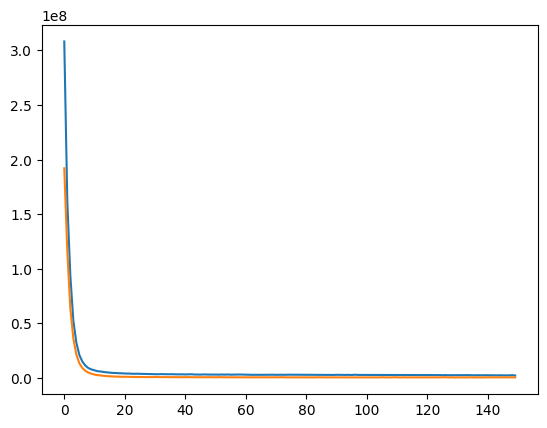

In [28]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df["loss"], label = "Training") 
plt.plot(history_df["val_loss"], label = "Validation")

***Hyper-parameter tunning***

In [29]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_absolute_error'])
early_stopping = EarlyStopping(monitor='val_loss', patience =30)

In [30]:
history = model.fit(x = x_train, y = y_train, batch_size = 64, epochs = 200, verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - loss: 2305878.0000 - mean_absolute_error: 839.5026 - val_loss: 429229.2188 - val_mean_absolute_error: 468.9965
Epoch 2/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - loss: 2269378.7500 - mean_absolute_error: 828.1419 - val_loss: 614229.1250 - val_mean_absolute_error: 570.5552
Epoch 3/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - loss: 2153805.2500 - mean_absolute_error: 833.4316 - val_loss: 509397.0000 - val_mean_absolute_error: 499.4911
Epoch 4/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - loss: 2205383.2500 - mean_absolute_error: 815.0114 - val_loss: 732664.0000 - val_mean_absolute_error: 606.1290
Epoch 5/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - loss: 2191607.7500 - mean_absolute_error: 814.2234 - val_loss: 577306.0625 - val_mean_absolute_error: 547.6751
Epoch 6/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - loss: 2252617.2500 - mean_absolute_error: 824.3408 - val_loss: 471354.9688 - val_mean_absolute_error: 

In [31]:
model = Sequential()
# First hidden layer
model.add(Dense(units=64, input_dim =x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
# Second hidden layer
model.add(Dense(units=128, activation='relu'))
# Output layer with a linear activation function for regression
model.add(Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 64)                  │           1,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,177 (39.75 KB)

 Trainable params: 10,177 (39.75 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_absolute_error'])
early_stopping = EarlyStopping(monitor='val_loss', patience =30)
history = model.fit(x = x_train, y = y_train, batch_size = 64, epochs = 200, verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 428421216.0000 - mean_absolute_error: 13207.6240 - val_loss: 220348160.0000 - val_mean_absolute_error: 10539.8096
Epoch 2/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - loss: 214616656.0000 - mean_absolute_error: 10363.7168 - val_loss: 158340672.0000 - val_mean_absolute_error: 8877.6836
Epoch 3/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - loss: 153419584.0000 - mean_absolute_error: 8459.6846 - val_loss: 105000056.0000 - val_mean_absolute_error: 6480.6362
Epoch 4/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - loss: 95739640.0000 - mean_absolute_error: 6026.5894 - val_loss: 63825964.0000 - val_mean_absolute_error: 4416.8887
Epoch 5/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step - loss: 60899604.0000 - mean_absolute_error: 4233.9824 - val_loss: 39714788.0000 - val_mean_absolute_error: 3213.5723
Epoch 6/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - loss: 40980156.0000 - mean_absolute_error: 3149.1274 - val_loss: 254873

In [33]:
model = Sequential()
# First hidden layer
model.add(Dense(units=128, input_dim =x_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
# Second hidden layer
model.add(Dense(units=256, activation='relu'))
# Output layer with a linear activation function for regression
model.add(Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 128)                 │           3,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,737 (143.50 KB)

 Trainable params: 36,737 (143.50 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_absolute_error'])
early_stopping = EarlyStopping(monitor='val_loss', patience =30)
history = model.fit(x = x_train, y = y_train, batch_size = 64, epochs = 200, verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 403327072.0000 - mean_absolute_error: 12804.5391 - val_loss: 187652192.0000 - val_mean_absolute_error: 9794.1357
Epoch 2/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - loss: 180058864.0000 - mean_absolute_error: 9300.3828 - val_loss: 102947112.0000 - val_mean_absolute_error: 6363.4312
Epoch 3/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - loss: 96341584.0000 - mean_absolute_error: 5757.8091 - val_loss: 50270048.0000 - val_mean_absolute_error: 3784.4939
Epoch 4/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - loss: 47006428.0000 - mean_absolute_error: 3638.4158 - val_loss: 27109186.0000 - val_mean_absolute_error: 2564.7502
Epoch 5/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - loss: 30445816.0000 - mean_absolute_error: 2738.0347 - val_loss: 15985547.0000 - val_mean_absolute_error: 1689.8855
Epoch 6/200
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step - loss: 19842934.0000 - mean_absolute_error: 2201.5608 - val_loss: 10678605.0

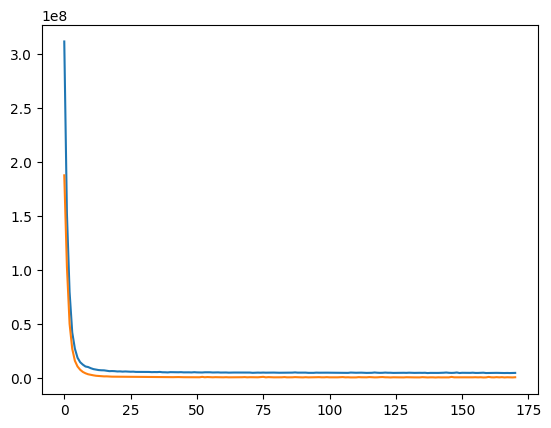

In [35]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df["loss"], label = "Training") 
plt.plot(history_df["val_loss"], label = "Validation")

***Clustering algorithms***

***Kmeans***

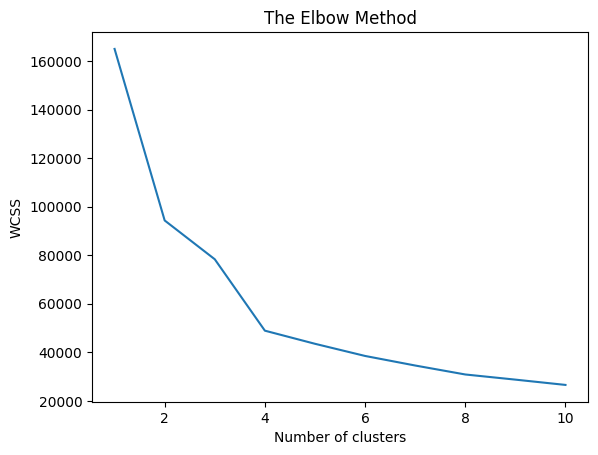

In [3]:
# Selecting features
features = ['Engine size', 'Year of manufacture', 'Mileage']
x = data[features]
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

inertial =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(x_scaled)
    inertia = kmeans.inertia_
    inertial.append(inertia)
# Plotting to observe the elbow for the optimum clusters
plt.plot(range(1, 11), inertial)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
# Choosing 4 as the number of clusters
kmeans = KMeans(n_clusters = 4, random_state =42)
kmeans.fit(x_scaled)
inertia = kmeans.inertia_
cluster_labels_pred = kmeans.predict(x_scaled)
# model evaluation
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)

In [42]:
print(f'DB score is: {db_score:.4f} and the Silhouette score is {s_score:.4f}')

DB score is: 0.9492 and the Silhouette score is 0.3496


<Axes: xlabel='Mileage', ylabel='Price'>

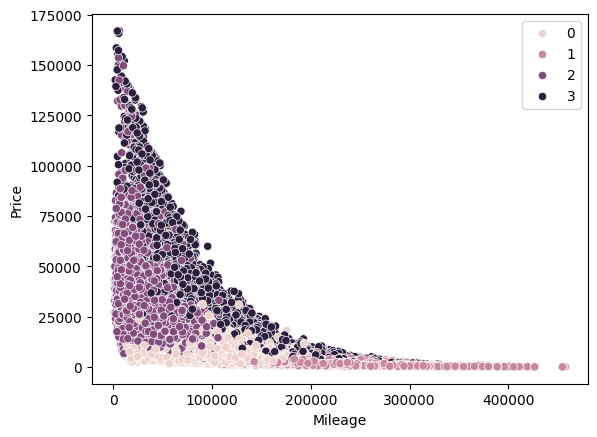

In [43]:
# Visualising clusters
sns.scatterplot(data=data, x='Mileage', y='Price', hue=cluster_labels_pred)

<Axes: xlabel='Year of manufacture', ylabel='Price'>

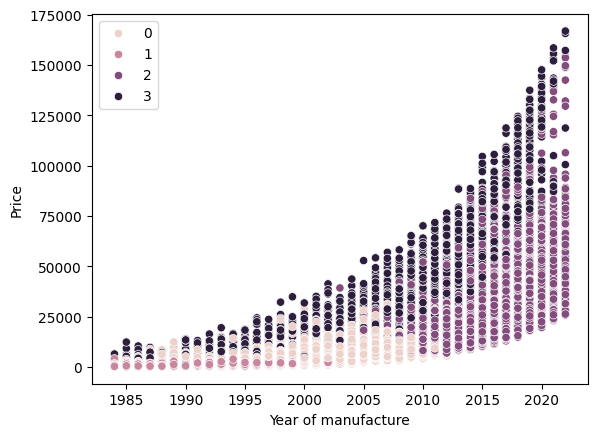

In [44]:
sns.scatterplot(data=data, x='Year of manufacture', y='Price', hue=cluster_labels_pred)

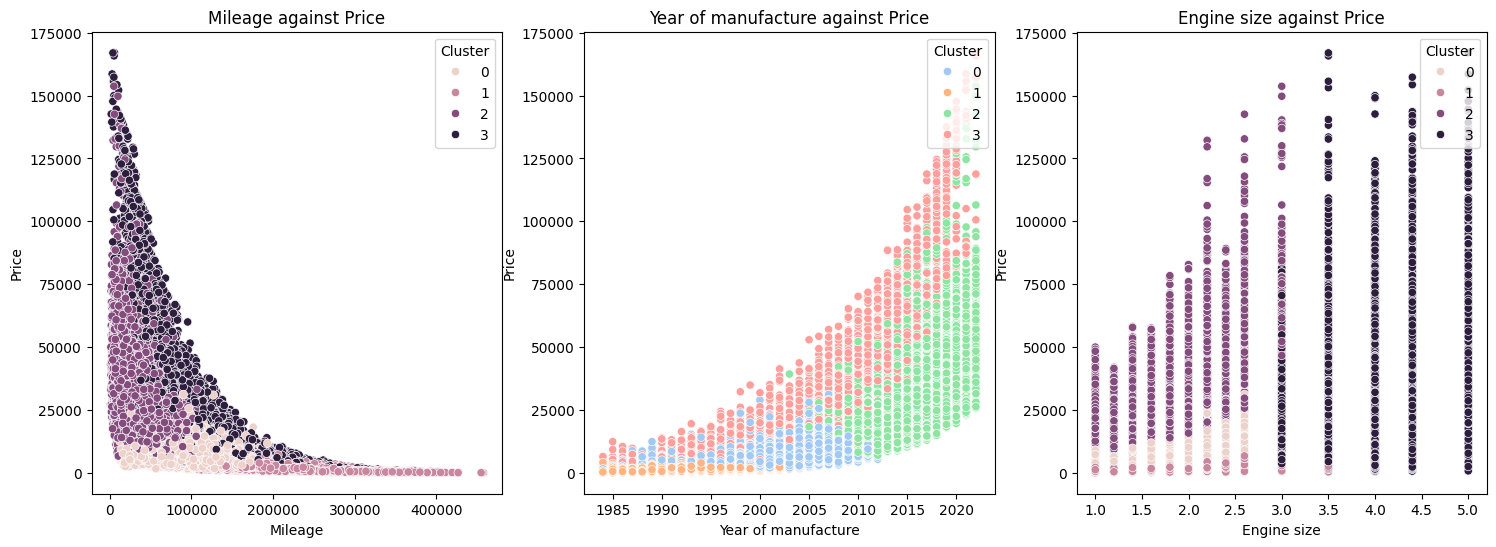

In [52]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# First subplot
plt.subplot(1, 3, 1)  
sns.scatterplot(data=data, x='Mileage', y='Price', hue=cluster_labels_pred)
plt.title('Mileage against Price')
plt.legend(title='Cluster', loc='upper right')

# Second subplot
plt.subplot(1, 3, 2) 
sns.scatterplot(data=data, x='Year of manufacture', y='Price', hue=cluster_labels_pred, palette='pastel')
plt.title('Year of manufacture against Price')
plt.legend(title='Cluster', loc='upper right')

# Third subplot
plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='Engine size', y='Price', hue=cluster_labels_pred)
plt.title('Engine size against Price')
plt.legend(title='Cluster', loc='upper right')

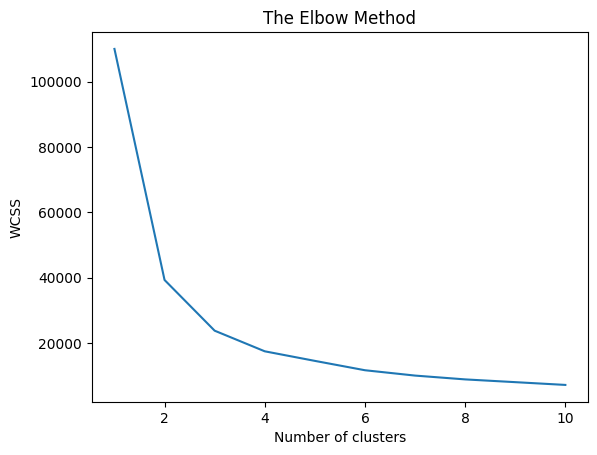

In [53]:
# Considering other combination of features and building the model if we could have a better clustering
features = ['Year of manufacture', 'Mileage']
x = data[features]
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)

inertial =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(x_scaled)
    inertia = kmeans.inertia_
    inertial.append(inertia)
# Plotting to observe the elbow for the optimum clusters
plt.plot(range(1, 11), inertial)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
# Choosing 3 as the number of clusters
kmeans = KMeans(n_clusters = 3, random_state =42)
kmeans.fit(x_scaled)
inertia = kmeans.inertia_
cluster_labels_pred = kmeans.predict(x_scaled)
# model evaluation
db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
s_score = silhouette_score(x_scaled, cluster_labels_pred)
print(f'DB score is: {db_score:.4f} and the Silhouette score is {s_score:.4f}')

DB score is: 0.7590 and the Silhouette score is 0.4629


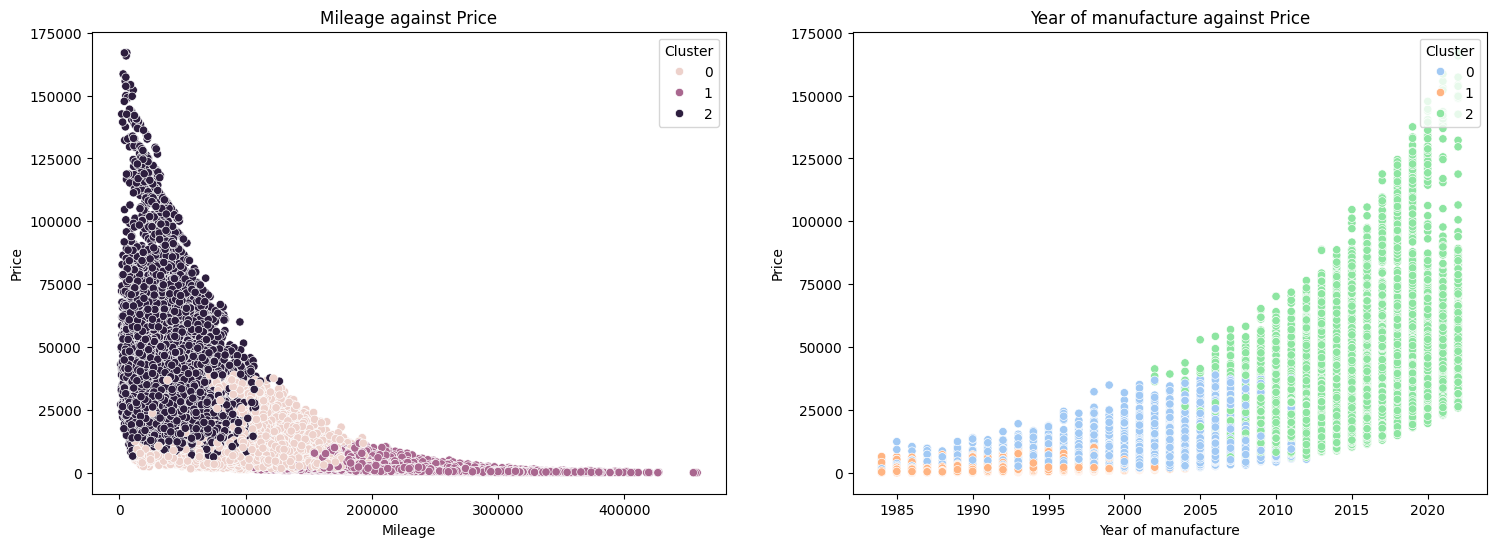

In [56]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# First subplot
plt.subplot(1, 2, 1)  
sns.scatterplot(data=data, x='Mileage', y='Price', hue=cluster_labels_pred)
plt.title('Mileage against Price')
plt.legend(title='Cluster', loc='upper right')

# Second subplot
plt.subplot(1, 2, 2) 
sns.scatterplot(data=data, x='Year of manufacture', y='Price', hue=cluster_labels_pred, palette='pastel')
plt.title('Year of manufacture against Price')
plt.legend(title='Cluster', loc='upper right')

***Hierachical Clustering***

In [7]:
agg_model = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agg_labels_pred = agg_model.fit_predict(x_scaled)
db_score = davies_bouldin_score(x_scaled, agg_labels_pred)
s_score = silhouette_score(x_scaled, agg_labels_pred)
print(f"Agglomerative Clustering - DB Index: {db_score}, Silhouette Score: {s_score}")

Agglomerative Clustering - DB Index: 0.9855608116715554, Silhouette Score: 0.3333131370968655
